## Inventory dynamics

Code from Sargent and Stachursky (2023) - https://github.com/QuantEcon/book-dp1

In [3]:
using Pkg
Pkg.activate("..") ## because we have environment files in the parent directory
Pkg.instantiate() ## to download all missing packages


  Activating project at `c:\Users\piotr\Dropbox\WNE\QuantEcon_all\QEcon2023\Code`


In [4]:
# load some packages we will need today
using Distributions, QuantEcon, IterTools, Plots

In [5]:

function create_inventory_model(; S=100, # Order size
    s=10, # Order threshold
    p=0.4) # Demand parameter
    ϕ = Geometric(p)
    h(x, d) = max(x - d, 0) + S * (x <= s)
    return (; S, s, ϕ, h)
    end

create_inventory_model (generic function with 1 method)

In [6]:
function sim_inventories(model; ts_length=200)
    (; S, s, ϕ, h) = model
    X = Vector{Int32}(undef, ts_length)
    X[1] = S # Initial condition
    for t in 1:(ts_length-1)
    X[t+1] = h(X[t], rand(ϕ))
    end
    return X
    end

sim_inventories (generic function with 1 method)

In [11]:
function compute_mc(model; d_max=100)
    (; S, s, ϕ, h) = model
    n = S + s + 1 # Size of state space
    state_vals = collect(0:(S + s))
    P = Matrix{Float64}(undef, n, n)
    for (i, j) in product(1:n, 1:n)
    P[i, j] = sum((h(i-1, d) == j-1) * pdf(ϕ, d) for d in 0:d_max)
    end
    return MarkovChain(P, state_vals)
    end

compute_mc (generic function with 1 method)

In [8]:

function compute_stationary_dist(model)
mc = compute_mc(model)
return mc.state_values, stationary_distributions(mc)[1]
end

compute_stationary_dist (generic function with 1 method)

In [17]:
model = create_inventory_model()
sample_path = sim_inventories(model; ts_length=200)
MChain = compute_mc(model)

ψ = compute_stationary_dist(model)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  101, 102, 103, 104, 105, 106, 107, 108, 109, 110], [9.064993270693079e-5, 6.043328847128726e-5, 0.00010072214745214551, 0.00016787024575357567, 0.0002797837429226261, 0.0004663062382043768, 0.0007771770636739618, 0.0012952951061232707, 0.0021588251768721177, 0.0035980419614535237  …  0.00993412771556625, 0.009893838856585398, 0.009826690758283973, 0.009714777261114924, 0.009528254765833176, 0.009217383940363595, 0.00869926589791429, 0.007835735827165447, 0.006396519042584041, 0.00399782440161503])

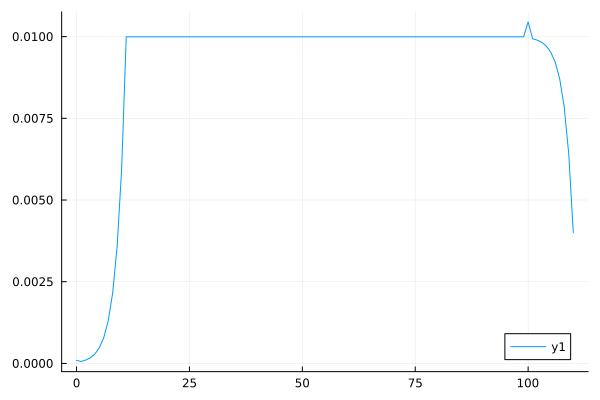

In [18]:
plot( ψ )

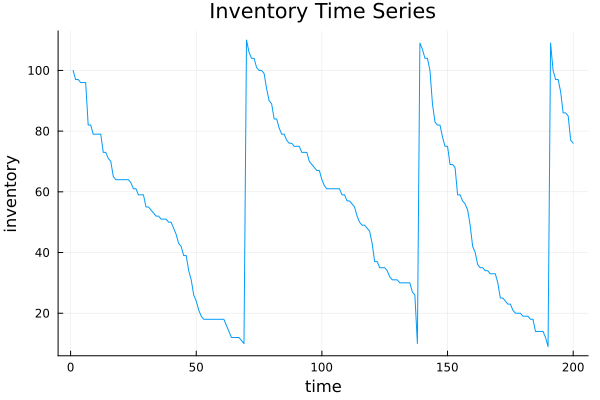

In [10]:
plot(sample_path, label=false, legend=:topleft, xlabel="time", ylabel="inventory", title="Inventory Time Series")

In [ ]:
plot(ψ, label=false, legend=:topleft, xlabel="inventory", ylabel="probability", title="Stationary Distribution of Inventory Model")

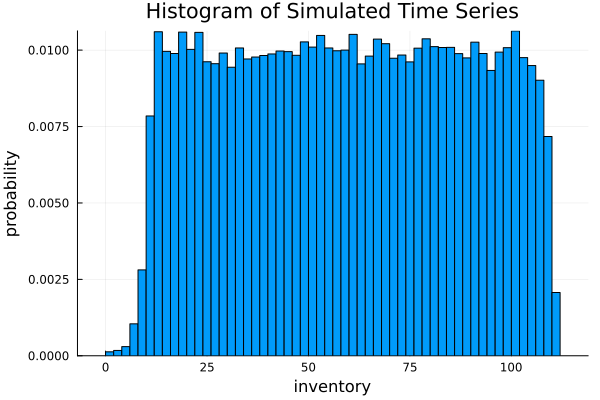

In [20]:

X = simulate(MChain, 100000, init = 1);
plot(X, seriestype=:histogram, normed=true, label=false, legend=:topleft, xlabel="inventory", ylabel="probability", title="Histogram of Simulated Time Series")

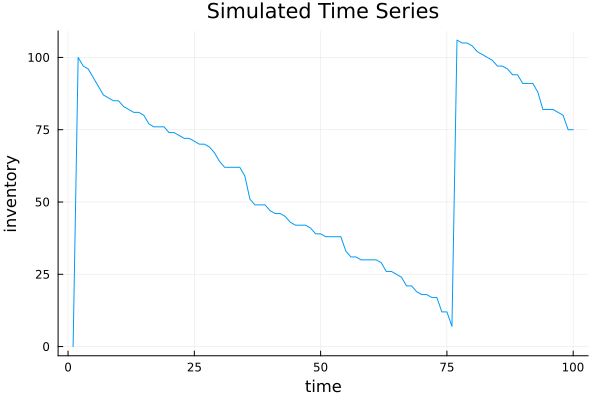

In [13]:

plot(X[1:100], label=false, legend=:topleft, xlabel="time", ylabel="inventory", title="Simulated Time Series")